In [148]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [149]:
def imshow(img):
    inv_normalize = transforms.Normalize(
       mean=[-0.1307/0.3081],
       std=[1/0.3081]
    )
    img = inv_normalize(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [150]:

def extract_classes(dataset, samples_per_class):
    class_indices = {} 
    count = 0
    nr_of_classes = 10
    for i in range(len(dataset)):
        _img_info, class_id = dataset.__getitem__(i)
        if class_id not in class_indices:    
            class_indices[class_id] = [i] 
            count += 1
        elif len(class_indices[class_id]) <  samples_per_class:
            class_indices[class_id].append(i)
            count += 1
        if count >= samples_per_class*nr_of_classes:
            break

    concat_indices = []  
    for (_, index) in class_indices.items():
        concat_indices += index 
    return concat_indices  

In [151]:
def get_data_loaders(): 
    transform = transforms.Compose(
        [transforms.RandomCrop(28),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])

    trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
    extract_class_idx = extract_classes(trainset, 1) 
    subsampler_train = torch.utils.data.SubsetRandomSampler(extract_class_idx)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                            sampler=subsampler_train)
    return trainloader, extract_class_idx

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0, 1, 2, 3, 4, 5, 7, 13, 15, 17]


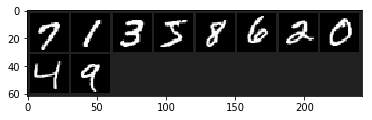

tensor(7) tensor(1) tensor(3) tensor(5) tensor(8) tensor(6) tensor(2) tensor(0) tensor(4) tensor(9)


In [152]:
loader, class_idx = get_data_loaders()
dataiter = iter(loader)
images, labels = dataiter.next()
print(class_idx)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % labels[j] for j in range(10)))